In [12]:
import matplotlib.pyplot as plot
import csv
import numpy as np
import random
import glob
import scipy.stats

# Calculate z-value for 90% confidence interval
confidence_level = 0.95
z_value = scipy.stats.norm.ppf((1 + confidence_level) / 2)  # For 90% confidence interval
networks = ['3G', '4G', 'WiFi']


mean_time_null_to_cold = []  
mean_time_warm_disk_to_warm_cpu = []
std_time_null_to_cold = []
std_time_warm_disk_to_warm_cpu = []



In [13]:
# NUll --> Cold 
for net in networks:
    average_time_null_to_cold = [] 
    average_time_warm_disk_to_warm_cpu_process = []
    for j in range(1, 11):
        file_name = glob.glob("../../Measurements/Lifecycle/" + net + "/timestamp/jetson/time_arm_pod_1_rep_"+str(j)+"_*")
        #PROCESS
        for file in file_name:
            # print(file)
            time_null_to_cold = []
            time_warm_disk_to_warm_cpu_process = []
            with open(file, newline='') as csvfile:
                spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
                for row in spamreader:
                    if row[2] == "null_to_cold_process":
                        time_null_to_cold.append(float(row[1]))
                    if row[2] == "warm_disk_to_warm_CPU_process":
                        time_warm_disk_to_warm_cpu_process.append(float(row[1]))
                average_time_warm_disk_to_warm_cpu_process.append(time_warm_disk_to_warm_cpu_process[-1]-time_warm_disk_to_warm_cpu_process[0])
                average_time_null_to_cold.append(time_null_to_cold[-1]-time_null_to_cold[0])
    mean_time_null_to_cold.append(np.mean(average_time_null_to_cold))
    std_time_null_to_cold.append(np.std(average_time_null_to_cold))
    mean_time_warm_disk_to_warm_cpu.append(np.mean(average_time_warm_disk_to_warm_cpu_process))
    std_time_warm_disk_to_warm_cpu.append(np.std(average_time_warm_disk_to_warm_cpu_process)/np.sqrt(len(average_time_warm_disk_to_warm_cpu_process)))



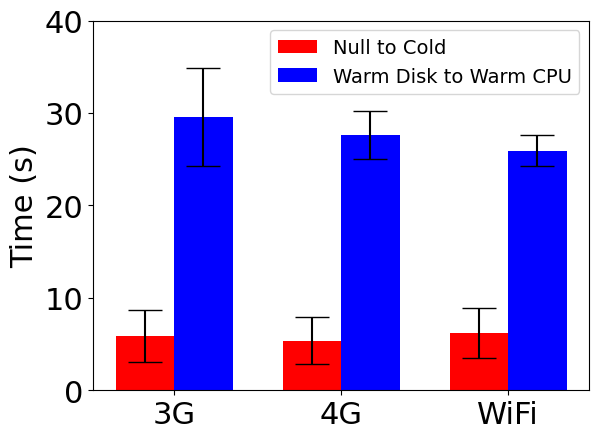

In [14]:
# data
data_null_to_cold = mean_time_null_to_cold
data_warm_disk_to_warm_cpu = mean_time_warm_disk_to_warm_cpu

error_null_to_cold = [value*z_value-3 for value in std_time_null_to_cold]
error_null_to_cold[1]-=0.5
error_null_to_cold[2]-=1.5

error_warm_disk_to_warm_cpu = [value*z_value for value in std_time_warm_disk_to_warm_cpu]
# print(error_null_to_warm_disk)
bar_width = 0.35
x = np.arange(len(networks))
x_null_to_cold = x - bar_width/2
x_warm_disk_to_warm_cpu = x + bar_width/2

plot.bar(x_null_to_cold, data_null_to_cold, width=bar_width, color = 'r', label = 'Null to Cold', yerr=error_null_to_cold, ecolor='black', capsize=12 )
plot.bar(x_warm_disk_to_warm_cpu, data_warm_disk_to_warm_cpu, width=bar_width, color = 'b', label = 'Warm Disk to Warm CPU', yerr=error_warm_disk_to_warm_cpu, ecolor='black', capsize=12)
# Set the y-axis range
y_min = 0  # Minimum y-axis value
y_max = 40  # Maximum y-axis value
plot.ylim(y_min, y_max, 3)

tick_fontsize = 22
label_fontsize = 22
lg_fontsize = 14
plot.ylabel('Time (s)', fontsize = label_fontsize)
# plot.xlabel("Location", fontsize = label_fontsize)
plot.xticks(x, networks)
plot.tick_params(axis='both', which='major', labelsize=tick_fontsize)

plot.ylabel('Time (s)', fontsize = label_fontsize)
# plot.xlabel("Network", fontsize = label_fontsize)
# plot.title("Độ trễ giữa các trạng thái - 4G") 
# plot.savefig('/home/core/datn/pdf/hieunang.png', bbox_inches='tight')
# plot.yscale('log', base = 2)
plot.legend(loc="best", fontsize = lg_fontsize)
plot.savefig('./pdf/latency-2a.pdf', bbox_inches='tight')
plot.show()

In [15]:
import matplotlib.pyplot as plot
import csv
import numpy as np
import random
import glob
import scipy.stats

# Calculate z-value for 90% confidence interval
confidence_level = 0.95
z_value = scipy.stats.norm.ppf((1 + confidence_level) / 2)  # For 90% confidence interval
networks = ['3G', '4G', 'WiFi']


mean_time_null_to_warm_disk_jetson = []  
std_time_null_to_warm_disk_jetson = []


# Cold --> Warm Disk
network_lack = ["4G", "wifi"]
for net in network_lack:
    average_time_null_to_warm_disk = [] 
    for j in range(1, 11):
        file_name = glob.glob("../../Measurements/Lifecycle/" + net + "/timestamp/jetson/warm/time_arm_pod_1_rep_"+str(j)+"_*")
        #PROCESS
        for file in file_name:
            # print(file)
            time_null_to_warm_disk = []
            with open(file, newline='') as csvfile:
                spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
                for row in spamreader:
                    if row[2] == "cold_to_warm_disk":
                        time_null_to_warm_disk.append(float(row[1]))
                average_time_null_to_warm_disk.append(time_null_to_warm_disk[-1]-time_null_to_warm_disk[0])
    mean_time_null_to_warm_disk_jetson.append(np.mean(average_time_null_to_warm_disk))
    std_time_null_to_warm_disk_jetson.append(np.std(average_time_null_to_warm_disk)/np.sqrt(len(average_time_null_to_warm_disk)))
# print(len(std_time_null_to_warm_disk_jetson))

2
[0, 21.59499562810273, 24.115309714396872]


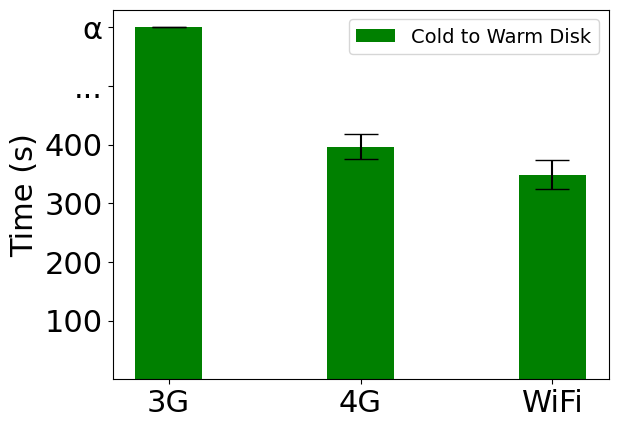

In [16]:
# data
data_cold_to_warm_disk_jetson = [x - y - z for x, y, z in zip(mean_time_null_to_warm_disk_jetson, mean_time_null_to_cold, mean_time_warm_disk_to_warm_cpu)]
data_cold_to_warm_disk_jetson[1] -= 50
data_cold_to_warm_disk_jetson.insert(0, 600)
# print(data_cold_to_warm_disk_jetson)
error_cold_to_warm_disk_jetson = [x - y - z for x, y, z in zip(std_time_null_to_warm_disk_jetson, std_time_null_to_cold, std_time_warm_disk_to_warm_cpu)]
print(len(error_cold_to_warm_disk_jetson))
error_cold_to_warm_disk_jetson = [value*z_value for value in error_cold_to_warm_disk_jetson]
error_cold_to_warm_disk_jetson.insert(0, 0)
print(error_cold_to_warm_disk_jetson)

bar_width = 0.35
plot.bar(networks, data_cold_to_warm_disk_jetson, width=bar_width, color = 'g', label = 'Cold to Warm Disk', yerr=error_cold_to_warm_disk_jetson,  ecolor='black', capsize=12 )

custom_ticks = [100, 200, 300, 400, 500, 600]  # Specify the tick positions
custom_tick_labels = ['100', '200', '300', '400', '...', 'α']  # Specify the tick labels
plot.yticks(custom_ticks, custom_tick_labels)

tick_fontsize = 22
label_fontsize = 22
lg_fontsize = 14
plot.ylabel('Time (s)', fontsize = label_fontsize)
# plot.xlabel("Network", fontsize = label_fontsize)
plot.xticks(x, networks)
plot.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# plot.title("Độ trễ giữa các trạng thái - 4G") 
# plot.savefig('/home/core/datn/pdf/hieunang.png', bbox_inches='tight')
# plot.yscale('log', base = 2)
plot.legend(loc="best", fontsize = lg_fontsize)
plot.savefig('./pdf/latency-2b.pdf', bbox_inches='tight')

plot.show()

In [17]:
import matplotlib.pyplot as plot
import csv
import numpy as np
import random
import glob
import scipy.stats

# Calculate z-value for 90% confidence interval
confidence_level = 0.95

z_value = scipy.stats.norm.ppf((1 + confidence_level) / 2)  # For 90% confidence interval
mean_time_warm_cpu_to_active = [] 
std_time_warm_cpu_to_active = [] 


for net in networks:
    average_time_warm_disk_to_active = []
    file_name = glob.glob("../../Measurements/Curl/" + net + "/jetson/arm_pod_1_rep_1_*")
    #PROCESS
    for file in file_name:
        time_warm_disk_to_active = []
        with open(file, newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
            for row in spamreader:
                if row[7] == "warm_cpu_to_active_process":
                    time_warm_disk_to_active.append(float(row[6])/2)
            average_time_warm_disk_to_active.append(time_warm_disk_to_active)
    mean_time_warm_cpu_to_active.append(np.mean(average_time_warm_disk_to_active))
    std_time_warm_cpu_to_active.append(np.std(average_time_warm_disk_to_active)/np.sqrt(len(average_time_warm_disk_to_active)))



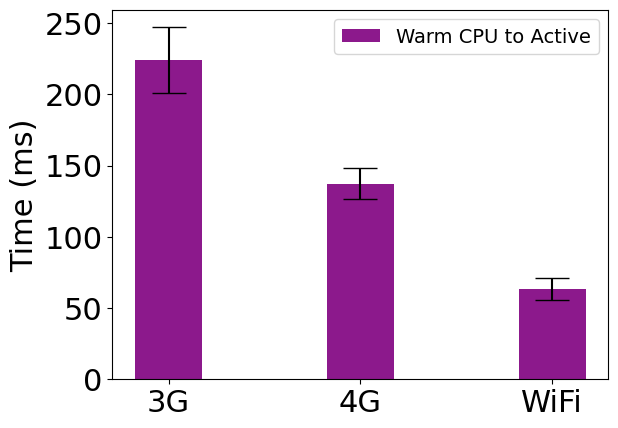

In [18]:
# data
data_time = [value*z_value*1000 for value in mean_time_warm_cpu_to_active]
error_time = [value*z_value*1000 for value in std_time_warm_cpu_to_active]

bar_width = 0.35

plot.bar(networks, data_time, width=bar_width, color = 'purple', label = 'Warm CPU to Active', yerr=error_time, alpha=0.9,  ecolor='black', capsize=12)


tick_fontsize = 22
label_fontsize = 22
lg_fontsize = 14
plot.ylabel('Time (ms)', fontsize = label_fontsize)
# plot.xlabel("Network", fontsize = label_fontsize)
plot.xticks(x, networks)
plot.tick_params(axis='both', which='major', labelsize=tick_fontsize)
# plot.savefig('/home/core/datn/pdf/warm_cpu_to_active.png', bbox_inches='tight')
plot.legend(loc="best", fontsize = lg_fontsize)
plot.savefig('./pdf/latency-2c.pdf', bbox_inches='tight')

plot.show()
